In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
samps = [*[f'A{i}' for i in range(2,7)],*[f'B{i}' for i in range(1,7)],
      *[f'C{i}' for i in range(1,7)],*[f'D{i}' for i in range(1,7)],
      *[f'E{i}' for i in range(1,4)],*[f'F{i}' for i in range(1,4)],*[f'G{i}' for i in range(1,4)]]


In [3]:
def load_dfs(samps, method):
    df_pc = pd.DataFrame()
    df_sc = pd.DataFrame()
    dfs = {}

    for sample in samps:    
        if method == "stimage":
            df = pd.read_csv(f"./her2st_new/stimage_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df
       
        elif method == "stnet":
            df = pd.read_csv(f"./her2st_new/stnet_cor_{sample}.csv")
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "hist2st":
            df = pd.read_csv(f"./her2st_new/hist2st_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "histogene":
            df = pd.read_csv(f"./her2st_new//histogene_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "deepspace":
            df = pd.read_csv(f"./deepspace4/{sample}/corR_teacher.txt", sep='\t')
            df_pc[sample] = df['corR']
            # dfs[sample] = df

        dfs[sample] = df
        
    return df_pc, dfs


In [4]:
# def load_dfs(samps, method):
#     df_pc = pd.DataFrame()
#     dfs = {}

#     for sample in samps:    
#         df = pd.read_csv(f"./stimage_cor_{sample}.csv") # OLD
#         df_pc[sample] = df["Pearson correlation"]

#         dfs[sample] = df
        
#     return df_pc, dfs

def boxplot_individual(df_list, method_id):    
    dfs = [df.assign(Method=method_id[i]) for i,df in enumerate(df_list)]
    cdf = pd.concat(dfs) 
    mdf = pd.melt(cdf, id_vars=['Method'], var_name=['Number'])
    ax = sns.boxplot(x="Number", y="value", hue="Method", data=mdf,showfliers=False)   
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    return ax

In [5]:
dfp_histog, dfa_histog = load_dfs(samps, "histogene")
dfp_stnet, dfa_stnet = load_dfs(samps, "stnet")
dfp_hist2st, dfa_hist2st = load_dfs(samps, "hist2st")
dfp_stimage ,dfa_stimage = load_dfs(samps, "stimage")

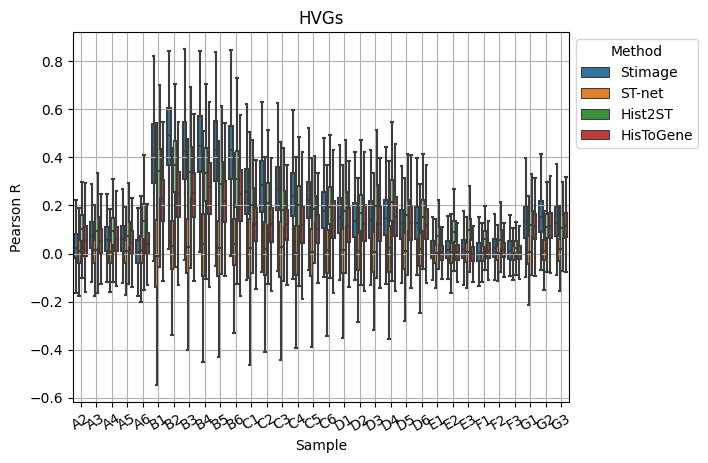

In [6]:
ax = boxplot_individual([dfp_stimage, dfp_stnet, dfp_hist2st, dfp_histog],
                        ["Stimage", "ST-net", "Hist2ST", "HisToGene"])
plt.xlabel("Sample")
plt.ylabel("Pearson R")
plt.title("HVGs")
plt.grid()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
# plt.savefig(f"PC-boxplot-PAM50.png", bbox_inches='tight')
plt.show()


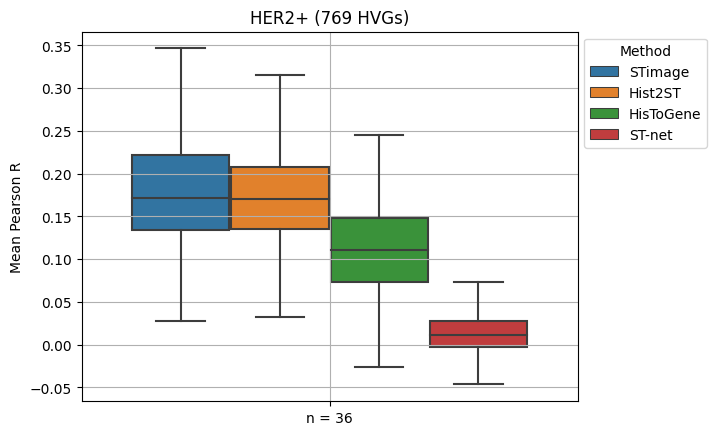

In [7]:
ax = boxplot_individual([df.mean(axis=1).to_frame() for df in [dfp_stimage, dfp_hist2st, dfp_histog, dfp_stnet]], 
                        ["STimage", "Hist2ST", "HisToGene", "ST-net"])
plt.xlabel("")
plt.ylabel("Mean Pearson R")
plt.title("HER2+ (769 HVGs)")
plt.grid()
plt.xticks([0], ['n = 36'])
# plt.savefig(f"{','.join(samps)}-PC-2boxplot-1000.png", bbox_inches='tight')
plt.show()

In [45]:
def load_dfs_ffpe(samps, method):
    df_pc = pd.DataFrame()
    df_sc = pd.DataFrame()
    dfs = {}

    for sample in samps:    
        if method == "stimage":
            df = pd.read_csv(f"../ffpe/stimage_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df
       
        elif method == "stnet":
            df = pd.read_csv(f"../ffpe/stnet_cor_{sample}.csv")
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "hist2st":
            df = pd.read_csv(f"../ffpe/hist2st_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "histogene":
            df = pd.read_csv(f"../ffpe/histogene_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            # dfs[sample] = df

        elif method == "deepspace":
            df = pd.read_csv(f"../ffpe/deepspace/{sample}/corR_teacher.txt", sep='\t')
            df_pc[sample] = df['corR']
            # dfs[sample] = df

        dfs[sample] = df
        
    return df_pc, dfs


In [48]:
ffsamps =  [
    "1142243F",
"1160920F",
"1168993F",
"block1",
"block2",
"CID4290",
"CID4465",
"CID44971",
"CID4535",
"FFPE"]

In [51]:
ffdfp_histog, ffdfa_histog = load_dfs_ffpe(ffsamps, "histogene")
# ffdfp_stnet, ffdfa_stnet = load_dfs_ffpe(ffsamps, "stnet")
ffdfp_hist2st, ffdfa_hist2st = load_dfs_ffpe(ffsamps, "hist2st")
ffdfp_deep, ffdfa_deep = load_dfs_ffpe(ffsamps, "deepspace")
# ffdfp_stimage ,ffdfa_stimage = load_dfs_ffpe(ffsamps, "stimage")

In [55]:
ffdfp_histog

,1142243F,1160920F,1168993F,block1,block2,CID4290,CID4465,CID44971,CID4535,FFPE
0,-0.022925,0.273975,-0.100816,0.231983,-0.012926,0.486888,-0.363421,0.339129,0.262374,0.294657
1,0.046342,0.061879,-0.157868,0.161529,0.045468,-0.502567,0.247942,-0.121122,0.225028,-0.099022
2,-0.001389,0.032513,-0.139316,-0.117617,-0.060040,0.482916,0.364875,0.412743,0.235448,0.206417
3,-0.001446,0.045026,0.318023,0.218024,0.170665,0.413630,0.216206,0.425756,-0.273877,0.198610
4,0.026856,0.141159,-0.007121,0.114416,0.380211,0.417534,-0.213582,-0.341983,-0.037382,0.241003
5,-0.027947,-0.124180,0.244447,-0.126700,-0.058884,-0.205297,0.374742,0.294798,0.320623,0.260238
6,0.014236,-0.080148,0.173399,0.409952,0.012887,0.495462,-0.239868,0.359099,-0.118506,0.199435
7,0.010438,0.196614,0.070223,0.268653,0.175450,-0.214663,-0.121764,-0.184101,0.320790,-0.175232
8,0.113233,0.156612,0.329032,0.236645,-0.159626,-0.312097,0.318580,-0.362290,0.168741,0.045386
9,-0.046589,0.172136,0.018989,-0.026447,-0.062566,0.306336,0.392952,-0.221750,0.011261,0.052686


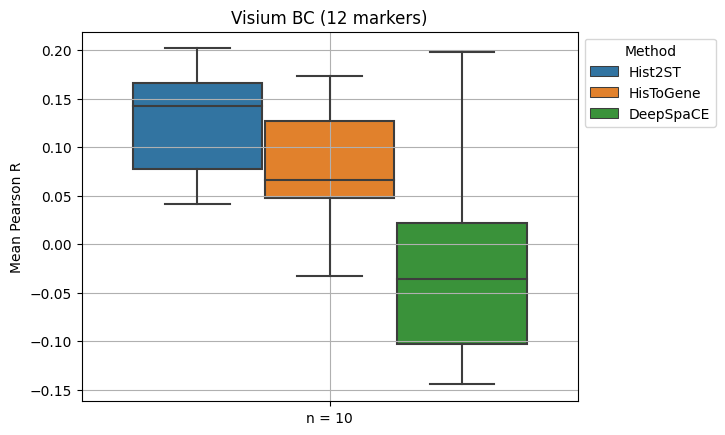

In [59]:
ax = boxplot_individual([df.mean(axis=1).to_frame() for df in [ffdfp_hist2st, ffdfp_histog, ffdfp_deep]], 
                        ["Hist2ST", "HisToGene", "DeepSpaCE"])
plt.xlabel("")
plt.ylabel("Mean Pearson R")
plt.title("Visium BC (12 markers)")
plt.grid()
plt.xticks([0], ['n = 10'])
# plt.savefig(f"{','.join(samps)}-PC-2boxplot-1000.png", bbox_inches='tight')
plt.show()

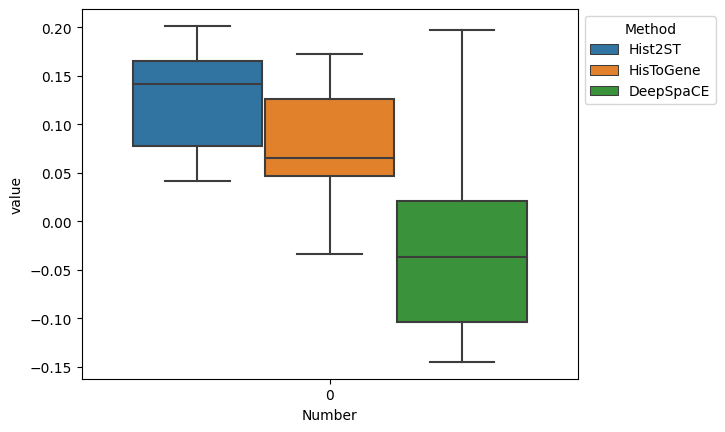

In [61]:
df_list = [df.mean(axis=1).to_frame() for df in [ffdfp_hist2st, ffdfp_histog, ffdfp_deep]]
method_id = ["Hist2ST", "HisToGene", "DeepSpaCE"]
dfs = [df.assign(Method=method_id[i]) for i,df in enumerate(df_list)]
cdf = pd.concat(dfs) 
mdf = pd.melt(cdf, id_vars=['Method'], var_name=['Number'])
ax = sns.boxplot(x="Number", y="value", hue="Method", data=mdf,showfliers=False)   
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [64]:
cdf0 = cdf

In [65]:
df_list = [df.mean(axis=1).to_frame() for df in [dfp_stimage, dfp_hist2st, dfp_histog, dfp_stnet]]
method_id = ["STimage", "Hist2ST", "HisToGene", "ST-net"]
dfs = [df.assign(Method=method_id[i]) for i,df in enumerate(df_list)]
cdf = pd.concat(dfs) 


In [71]:
cdf1 = cdf.rename(columns={0: 1})

In [75]:
mdf0 = pd.melt(cdf0, id_vars=['Method'], var_name=['Number'])
mdf1 = pd.melt(cdf1, id_vars=['Method'], var_name=['Number'])

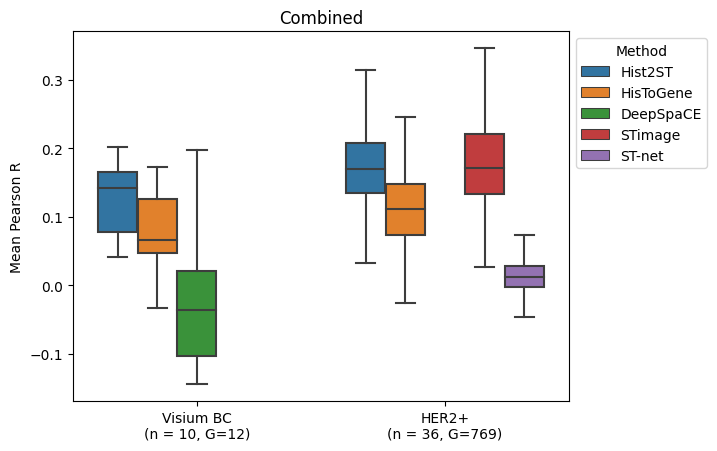

In [88]:

ax = sns.boxplot(x="Number", y="value", hue="Method", data=pd.concat([mdf0,mdf1]) ,showfliers=False)   
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.ylabel("Mean Pearson R")
plt.title("Combined")
# plt.grid()
plt.xticks([0,1], ['Visium BC\n(n = 10, G=12)', 'HER2+\n(n = 36, G=769)'])
# plt.savefig(f"{','.join(samps)}-PC-2boxplot-1000.png", bbox_inches='tight')
plt.show()

In [90]:
samps_all = ["VLP78_A","VLP79_A","VLP79_D","VLP80_A","VLP80_D","VLP81_A","VLP82_A","VLP82_D","VLP83_A","VLP83_D"]

In [110]:
def load_dfs_pf(samps, method):
    df_pc = pd.DataFrame()
    df_sc = pd.DataFrame()
    dfs = {}

    for sample in samps:    
        if method == "stimage":
            df = pd.read_csv(f"../pf_cv2/stimage_cor_{sample}.csv")
            df_pc[sample] = df["Pearson correlation"]
            df_sc[sample] =df["Spearman correlation"]
       
        elif method == "stnet":
            df = pd.read_csv(f"../pf_cv2/stnet_cor_{sample}.csv")
            df_pc[sample] = df["Pearson correlation"]
            df_sc[sample] =df["Spearman correlation"]

        elif method == "hist2st":
            df = pd.read_csv(f"../pf_cv2/hist2st_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            df_sc[sample] =df["Spearman correlation"]

        elif method == "histogene":
            df = pd.read_csv(f"../pf_cv2/histogene_cor_{sample}.csv") # OLD
            df_pc[sample] = df["Pearson correlation"]
            df_sc[sample] =df["Spearman correlation"]

        elif method == "deepspace":
            df = pd.read_csv(f"../pf_cv2/deepspace/{sample}/corR_teacher.txt", sep='\t')
            df_pc[sample] = df['corR']
            df_sc[sample] =df['corS']

        dfs[sample] = df
        
    return df_pc, df_sc, dfs


In [111]:
dfp_stimage, dfs_stimage, dfa_stimage = load_dfs_pf(samps_all, "stimage")
dfp_hist2st, dfs_hist2st, dfa_hist2st = load_dfs_pf(samps_all, "hist2st")
dfp_deepsp, dfs_deepsp, dfa_deepsp = load_dfs_pf(samps_all, "deepspace")
dfp_histog, dfs_histog, dfa_histog = load_dfs_pf(samps_all, "histogene")
dfp_stnet, dfs_stnet, dfa_stnet = load_dfs_pf(samps_all, "stnet")

In [116]:

df_list = [df.mean(axis=1).to_frame() for df in [dfp_stimage, dfp_hist2st, dfp_deepsp, dfp_histog, dfp_stnet]]
method_id =                  ["STimage", "Hist2ST", "DeepSpaCE", "HisToGene", "ST-net"]
dfs = [df.assign(Method=method_id[i]) for i,df in enumerate(df_list)]
cdf = pd.concat(dfs) 
cdf = cdf.rename(columns={0: 2})
mdf = pd.melt(cdf, id_vars=['Method'], var_name=['Number'])


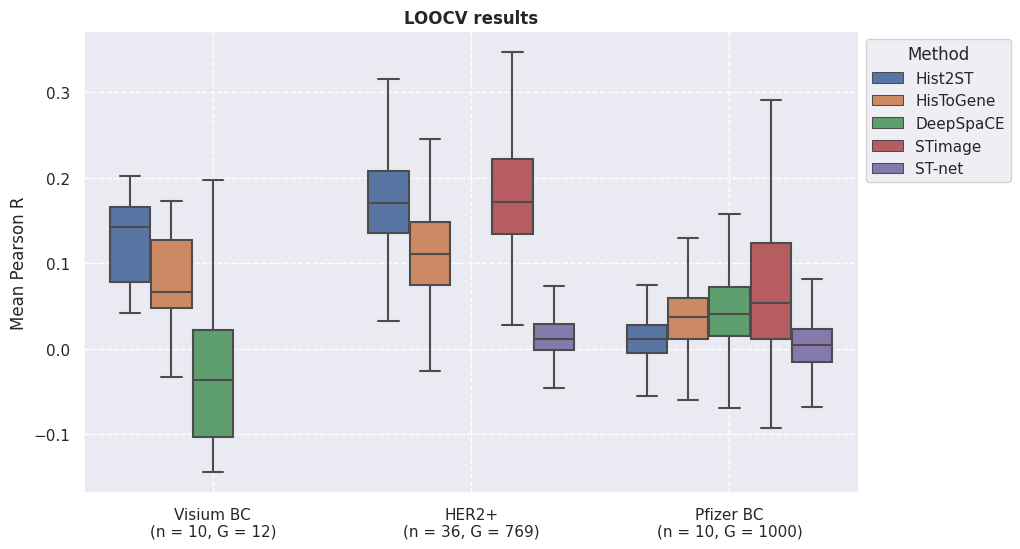

In [135]:
plt.figure(figsize=(10,6))
# sns.set_palette('pastel')
sns.set()
ax = sns.boxplot(x="Number", y="value", hue="Method", data=pd.concat([mdf0,mdf1, mdf]) ,showfliers=False)   
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('LOOCV results', weight='bold')

plt.xlabel("")
plt.ylabel("Mean Pearson R")
# plt.title("LOOCV results")
# plt.grid()
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')

plt.xticks([0,1,2], ['Visium BC\n(n = 10, G = 12)', 'HER2+\n(n = 36, G = 769)',
                    'Pfizer BC\n(n = 10, G = 1000)'])
plt.savefig(f"combined.png", bbox_inches='tight')
plt.savefig(f"combined.pdf", bbox_inches='tight')
plt.show()